In [2]:
from imports import *
from read_data import *
from bgls import *
from periodogram import compute_LSperiodogram, bootstrap_FAP
import matplotlib.gridspec as gridspec
%matplotlib inline


Bad key "xtick.labeltop" on line 358 in
/Users/ryancloutier/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## get RV and transit data

In [3]:
# get data
bjd, rv, erv, fwhm, bis, Halpha, eHalpha, Hbeta, eHbeta, Hgamma, eHgamma, NaD, eNaD, Sindex, eSindex = read_HARPS()

# remove bad points known from loocv
badRVs = np.array([48])
g = np.delete(np.arange(bjd.size), badRVs)
bjd, rv, erv, fwhm, bis, Halpha, eHalpha, Hbeta, eHbeta, Hgamma, eHgamma, NaD, eNaD, Sindex, eSindex = \
bjd[g],rv[g],erv[g],fwhm[g],bis[g],Halpha[g],eHalpha[g],Hbeta[g],eHbeta[g],Hgamma[g],eHgamma[g],NaD[g],eNaD[g],Sindex[g],eSindex[g]
print bjd.size

-5678.16
113


Text(0,0.5,u'raw RV [m/s]')

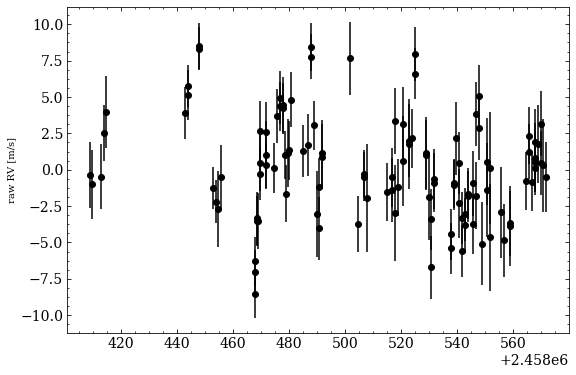

In [4]:
# plot RV time-series
plt.figure(figsize=(9,6))
plt.errorbar(bjd, rv, erv, fmt='ko', capsize=0, label='HARPS')
plt.ylabel('raw RV [m/s]')

## plot periodograms

In [5]:
def do_bootstrap(x, y, ey, plims, N):
    pwrs,faps,_,_ = bootstrap_FAP(x, y, ey, plims=plims, N=int(N), quiet=True)
    return faps, pwrs


def scale_err(rv, erv, arr):
    '''Derive uncertainties for an input timeseries based on the fractional RV uncertainties for use in periodogram
    calulations.'''
    return arr * erv / rv

In [7]:
# compute bootstrap results once
Hlen = bjd.max()-bjd.min()

save_bootstraps = 0
if save_bootstraps:
    
    # HARPS
    yH = [rv, bjd, fwhm, bis, \
          Halpha, Hbeta, Hgamma, NaD, Sindex]
    eyH = [erv, np.ones(bjd.size), scale_err(rv,erv,fwhm), scale_err(rv,erv,bis), \
           eHalpha, eHbeta, eHgamma, eNaD, eSindex]
    labelsH = ['RV','WF','FWHM','BIS','Halpha','Hbeta','Hgamma','NaD','Sindex']
    for i in range(len(yH)):
        print i/float(len(yH))
        faps, pwrs = do_bootstrap(bjd, yH[i], eyH[i], (.5,Hlen), 1e4)
        np.save('output_data/FAPS_%s'%labelsH[i], np.array([faps,pwrs]).T)

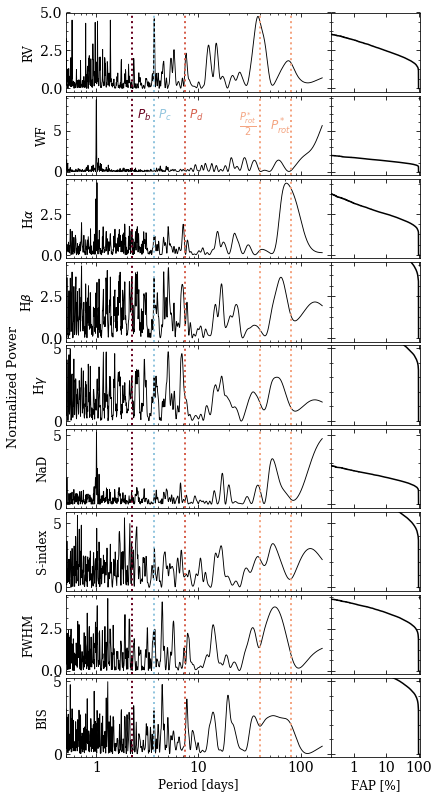

In [11]:
# plot periodograms
colH = 'k'
fig = plt.figure(figsize=(6,11))
gs = gridspec.GridSpec(9,4)

# RVs
ax01 = plt.subplot(gs[0,:-1])
per,pwr,_ = compute_LSperiodogram(bjd, rv, erv, plims=(.5,Hlen))
normH = pwr.std()
ax01.plot(per, pwr/normH, '-', c=colH, lw=.9)
# RV faps
ax02 = plt.subplot(gs[0,-1])
faps, pwrs = np.load('output_data/FAPS_RV.npy').T
ax02.plot(faps, pwrs/normH, '-', c=colH)
# customize
ax02.set_xscale('log'), ax01.set_xscale('log')
ax02.set_xlim((2e-3,1.1)), ax01.set_xlim((.5,200))
ax02.set_ylim(ax01.get_ylim()), ax02.set_yticklabels('')
ax02.set_xticks(np.logspace(-2,0,3))
ax01.set_ylabel('RV', fontsize=12)
ax02.set_xticklabels(''), ax01.set_xticklabels('')

# WF
ax11 = plt.subplot(gs[1,:-1])
per,pwr,_ = compute_LSperiodogram(bjd, bjd, np.ones(bjd.size), plims=(.5,Hlen))
normH = pwr.std()
ax11.plot(per, pwr/normH, '-', c=colH, lw=.9)
# WF faps
ax12 = plt.subplot(gs[1,-1])
faps, pwrs = np.load('output_data/FAPS_WF.npy').T
ax12.plot(faps, pwrs/normH, '-', c=colH)
# customize
ax12.set_xscale('log'), ax11.set_xscale('log')
ax12.set_xlim((2e-3,1.1)), ax11.set_xlim((.5,200))
ax12.set_ylim(ax11.get_ylim()), ax12.set_yticklabels('')
ax12.set_xticks(np.logspace(-2,0,3))
ax11.set_ylabel('WF', fontsize=12)
ax11.set_xticklabels(''), ax12.set_xticklabels('')

# Halpha
ax21 = plt.subplot(gs[2,:-1])
per,pwr,_ = compute_LSperiodogram(bjd, Halpha, eHalpha, plims=(.5,Hlen))
normH = pwr.std()
ax21.plot(per, pwr/normH, '-', c=colH, lw=.9)
# WF faps
ax22 = plt.subplot(gs[2,-1])
faps, pwrs = np.load('output_data/FAPS_Halpha.npy').T
ax22.plot(faps, pwrs/normH, '-', c=colH)
# customize
ax22.set_xscale('log'), ax21.set_xscale('log')
ax22.set_xlim((2e-3,1.1)), ax21.set_xlim((.5,200))
ax22.set_ylim(ax21.get_ylim()), ax22.set_yticklabels('')
ax22.set_xticks(np.logspace(-2,0,3))
ax21.set_ylabel('H$\\alpha$', fontsize=12)
ax22.set_xticklabels(''), ax21.set_xticklabels('')

# Hbeta
ax31 = plt.subplot(gs[3,:-1])
per,pwr,_ = compute_LSperiodogram(bjd, Hbeta, eHbeta, plims=(.5,Hlen))
normH = pwr.std()
ax31.plot(per, pwr/normH, '-', c=colH, lw=.9)
# WF faps
ax32 = plt.subplot(gs[3,-1])
faps, pwrs = np.load('output_data/FAPS_Hbeta.npy').T
ax32.plot(faps, pwrs/normH, '-', c=colH)
# customize
ax32.set_xscale('log'), ax31.set_xscale('log')
ax32.set_xlim((2e-3,1.1)), ax31.set_xlim((.5,200))
ax32.set_ylim(ax31.get_ylim()), ax32.set_yticklabels('')
ax32.set_xticks(np.logspace(-2,0,3))
ax31.set_ylabel('H$\\beta$', fontsize=12)
ax32.set_xticklabels(''), ax31.set_xticklabels('')

# Hgamma
ax41 = plt.subplot(gs[4,:-1])
per,pwr,_ = compute_LSperiodogram(bjd, Hgamma, eHgamma, plims=(.5,Hlen))
normH = pwr.std()
ax41.plot(per, pwr/normH, '-', c=colH, lw=.9)
# WF faps
ax42 = plt.subplot(gs[4,-1])
faps, pwrs = np.load('output_data/FAPS_Hgamma.npy').T
ax42.plot(faps, pwrs/normH, '-', c=colH)
# customize
ax42.set_xscale('log'), ax41.set_xscale('log')
ax42.set_xlim((2e-3,1.1)), ax41.set_xlim((.5,200))
ax42.set_ylim(ax41.get_ylim()), ax42.set_yticklabels('')
ax42.set_xticks(np.logspace(-2,0,3))
ax41.set_ylabel('H$\\gamma$', fontsize=12)
ax42.set_xticklabels(''), ax41.set_xticklabels('')

# NaD
ax51 = plt.subplot(gs[5,:-1])
per,pwr,_ = compute_LSperiodogram(bjd, NaD, eNaD, plims=(.5,Hlen))
normH = pwr.std()
ax51.plot(per, pwr/normH, '-', c=colH, lw=.9)
# WF faps
ax52 = plt.subplot(gs[5,-1])
faps, pwrs = np.load('output_data/FAPS_NaD.npy').T
ax52.plot(faps, pwrs/normH, '-', c=colH)
# customize
ax52.set_xscale('log'), ax51.set_xscale('log')
ax52.set_xlim((2e-3,1.1)), ax51.set_xlim((.5,200))
ax52.set_ylim(ax51.get_ylim()), ax52.set_yticklabels('')
ax52.set_xticks(np.logspace(-2,0,3))
ax51.set_ylabel('NaD', fontsize=12)
ax52.set_xticklabels(''), ax51.set_xticklabels('')

# S-index
ax61 = plt.subplot(gs[6,:-1])
per,pwr,_ = compute_LSperiodogram(bjd, Sindex, eSindex, plims=(.5,Hlen))
normH = pwr.std()
ax61.plot(per, pwr/normH, '-', c=colH, lw=.9)
# WF faps
ax62 = plt.subplot(gs[6,-1])
faps, pwrs = np.load('output_data/FAPS_Sindex.npy').T
ax62.plot(faps, pwrs/normH, '-', c=colH)
# customize
ax62.set_xscale('log'), ax61.set_xscale('log')
ax62.set_xlim((2e-3,1.1)), ax61.set_xlim((.5,200))
ax62.set_ylim(ax61.get_ylim()), ax62.set_yticklabels('')
ax62.set_xticks(np.logspace(-2,0,3))
ax61.set_ylabel('S-index', fontsize=12)
ax62.set_xticklabels(''), ax61.set_xticklabels('')

# FWHM
ax71 = plt.subplot(gs[7,:-1])
per,pwr,_ = compute_LSperiodogram(bjd, fwhm, scale_err(rv,erv,fwhm), plims=(.5,Hlen))
normH = pwr.std()
ax71.plot(per, pwr/normH, '-', c=colH, lw=.9)
# WF faps
ax72 = plt.subplot(gs[7,-1])
faps, pwrs = np.load('output_data/FAPS_FWHM.npy').T
ax72.plot(faps, pwrs/normH, '-', c=colH)
# customize
ax72.set_xscale('log'), ax71.set_xscale('log')
ax72.set_xlim((2e-3,1.1)), ax71.set_xlim((.5,200))
ax72.set_ylim(ax71.get_ylim()), ax72.set_yticklabels('')
ax72.set_xticks(np.logspace(-2,0,3))
ax71.set_ylabel('FWHM', fontsize=12)
ax72.set_xticklabels(''), ax71.set_xticklabels('')

# BIS
ax81 = plt.subplot(gs[8,:-1])
per,pwr,_ = compute_LSperiodogram(bjd, bis, scale_err(rv,erv,bis), plims=(.5,Hlen))
normH = pwr.std()
ax81.plot(per, pwr/normH, '-', c=colH, lw=.9)
# WF faps
ax82 = plt.subplot(gs[8,-1])
faps, pwrs = np.load('output_data/FAPS_FWHM.npy').T
ax82.plot(faps, pwrs/normH, '-', c=colH)
# customize
ax82.set_xscale('log'), ax81.set_xscale('log')
ax82.set_xlim((2e-3,1.1)), ax81.set_xlim((.5,200))
ax82.set_ylim(ax81.get_ylim()), ax82.set_yticklabels('')
ax82.set_xticks(np.logspace(-2,0,3))
ax81.set_ylabel('BIS', fontsize=12)
ax81.set_xticks(np.logspace(0,2,3)), ax81.set_xticklabels(['1','10','100'])
ax82.set_xticks(np.logspace(-2,0,3)), ax82.set_xticklabels(['1','10','100'])
ax81.set_xlabel('Period [days]', fontsize=12), ax82.set_xlabel('FAP [%]', fontsize=12)

# legend
ax41.text(-.22, 1.12, 'Normalized Power', fontsize=13, rotation=90, transform=ax41.transAxes)

# plot vertical lines
#cols = ['#feb24c','#fc4e2a','#800026','#e31a1c','#fd8d3c']
cols = ['#f4a582','#f4a582','#67001f','#92c5de','#d6604d']
vert = 1
if vert:
    colind = 0
    for p in [40,80,2.25,3.69,7.45]: 
        ax01.axvline(p, ls=':', color=cols[colind], lw=2)
        ax11.axvline(p, ls=':', color=cols[colind], lw=2)
        ax21.axvline(p, ls=':', color=cols[colind], lw=2)
        ax31.axvline(p, ls=':', color=cols[colind], lw=2)
        ax41.axvline(p, ls=':', color=cols[colind], lw=2)
        ax51.axvline(p, ls=':', color=cols[colind], lw=2)
        ax61.axvline(p, ls=':', color=cols[colind], lw=2)
        ax71.axvline(p, ls=':', color=cols[colind], lw=2)
        ax81.axvline(p, ls=':', color=cols[colind], lw=2)
        colind += 1
    ax11.text(2.5, 6.5, r'$P_b$', fontsize=12, weight='semibold', color=cols[2])
    ax11.text(4, 6.5, r'$P_c$', fontsize=12, weight='semibold', color=cols[3])
    ax11.text(8, 6.5, r'$P_d$', fontsize=12, weight='semibold', color=cols[4])
    ax11.text(25, 5, r'$\frac{P_{rot}^*}{2}$', fontsize=14, weight='semibold', color=cols[1])
    ax11.text(50, 5, r'$P_{rot}^*$', fontsize=12, weight='semibold', color=cols[0])
    
fig.subplots_adjust(hspace=.05, wspace=0, bottom=.05, left=.15, top=.99, right=.97)
plt.savefig('/Users/ryancloutier/Research/TOI_175/plots/periodograms.png')